# Estimation and Predictions - Multiple Variable Regression


Now that we have covered simple linear regression, lets kick it up a notch !<br><br>
In the previous example for we used only one input variable, but what if we have more than one variable that describes what we want to predict ? <br><br>
We can use Multivariable Regression. This allows for multiple input variables, however the number of output variables stay the same ( One ).<br><br>
In the real world the data we are using to predict, will not always follow a straight line or linear function. This means we will have to use more complex equations to find trends in the data.
 <div id="banner">
   <div class="inline-block">
        <img src="multiV_lin.png" alt="Drawing" style="width: 450px;"/>
     </div>

   <div class="inline-block">
        <img src="3dcurve.jpg" alt="Drawing" style="width: 450px;"/>
    </div>
</div>

SciPy only has functionality for a single input variable, fortunately however Scikit-Learn has a multivariable regression function implemented!

Lets use some real world example. Provided is a data set which contains advertising information in different formats and the number of total sales achieved by the company. Out goal is to find a relationship between the different types of advertising and the number of sales achieved.


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import numpy as np # for data manipulation
import pandas as pd # Used to import data from a file and data manipulation
from sklearn.metrics import mean_squared_error, r2_score

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


input_file = "Advertising_fixed.csv"

df = pd.read_csv(input_file, header = 0)
original_headers = list(df.columns.values)
df = df._get_numeric_data()
numeric_headers = list(df.columns.values)
data_matrix = df.as_matrix()

print("Shape of the data set (rows, columns) : "+ str(np.shape(data_matrix)))
print(numeric_headers)
print (data_matrix)


Shape of the data set (rows, columns) : (200, 5)
['Index', 'TV', 'radio', 'newspaper', 'sales']
[[   1.   230.1   37.8   69.2   22.1]
 [   2.    44.5   39.3   45.1   10.4]
 [   3.    17.2   45.9   69.3    9.3]
 [   4.   151.5   41.3   58.5   18.5]
 [   5.   180.8   10.8   58.4   12.9]
 [   6.     8.7   48.9   75.     7.2]
 [   7.    57.5   32.8   23.5   11.8]
 [   8.   120.2   19.6   11.6   13.2]
 [   9.     8.6    2.1    1.     4.8]
 [  10.   199.8    2.6   21.2   10.6]
 [  11.    66.1    5.8   24.2    8.6]
 [  12.   214.7   24.     4.    17.4]
 [  13.    23.8   35.1   65.9    9.2]
 [  14.    97.5    7.6    7.2    9.7]
 [  15.   204.1   32.9   46.    19. ]
 [  16.   195.4   47.7   52.9   22.4]
 [  17.    67.8   36.6  114.    12.5]
 [  18.   281.4   39.6   55.8   24.4]
 [  19.    69.2   20.5   18.3   11.3]
 [  20.   147.3   23.9   19.1   14.6]
 [  21.   218.4   27.7   53.4   18. ]
 [  22.   237.4    5.1   23.5   12.5]
 [  23.    13.2   15.9   49.6    5.6]
 [  24.   228.3   16.9   26.2 

Lets split the data into training and test sets.
And plot each type of advertising with the total number of sales, to have an idea of the relationshipts between them.<br><br>
We will just use Television and Radio data for now, to allow for easier visualization of the model.

In [20]:
data = np.array(data_matrix[:,[1,2]])
sales = np.array(data_matrix[:,4])

train_samples = int(len(data)*0.7)
print("Number of training samples %d" %train_samples)
train_data = data[0:train_samples]
test_data = data[train_samples:]
print (train_data)

train_sales = sales[0:train_samples]
test_sales = sales[train_samples:]


Number of training samples 140
[[ 230.1   37.8]
 [  44.5   39.3]
 [  17.2   45.9]
 [ 151.5   41.3]
 [ 180.8   10.8]
 [   8.7   48.9]
 [  57.5   32.8]
 [ 120.2   19.6]
 [   8.6    2.1]
 [ 199.8    2.6]
 [  66.1    5.8]
 [ 214.7   24. ]
 [  23.8   35.1]
 [  97.5    7.6]
 [ 204.1   32.9]
 [ 195.4   47.7]
 [  67.8   36.6]
 [ 281.4   39.6]
 [  69.2   20.5]
 [ 147.3   23.9]
 [ 218.4   27.7]
 [ 237.4    5.1]
 [  13.2   15.9]
 [ 228.3   16.9]
 [  62.3   12.6]
 [ 262.9    3.5]
 [ 142.9   29.3]
 [ 240.1   16.7]
 [ 248.8   27.1]
 [  70.6   16. ]
 [ 292.9   28.3]
 [ 112.9   17.4]
 [  97.2    1.5]
 [ 265.6   20. ]
 [  95.7    1.4]
 [ 290.7    4.1]
 [ 266.9   43.8]
 [  74.7   49.4]
 [  43.1   26.7]
 [ 228.    37.7]
 [ 202.5   22.3]
 [ 177.    33.4]
 [ 293.6   27.7]
 [ 206.9    8.4]
 [  25.1   25.7]
 [ 175.1   22.5]
 [  89.7    9.9]
 [ 239.9   41.5]
 [ 227.2   15.8]
 [  66.9   11.7]
 [ 199.8    3.1]
 [ 100.4    9.6]
 [ 216.4   41.7]
 [ 182.6   46.2]
 [ 262.7   28.8]
 [ 198.9   49.4]
 [   7.3   28.1]


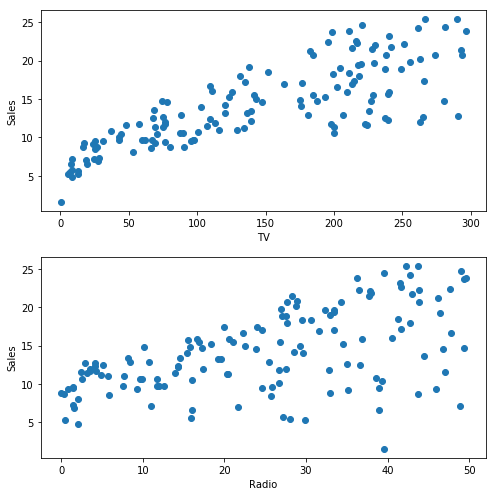

In [3]:
#f, (ax1, ax2, ax3) = plt.subplots(3,figsize=(7,7))
f, (ax1, ax2) = plt.subplots(2,figsize=(7,7))
ax1.scatter(train_data[:,0], train_sales)
ax1.set_xlabel('TV')
ax1.set_ylabel('Sales')

ax2.scatter(train_data[:,1], train_sales)
ax2.set_xlabel('Radio')
ax2.set_ylabel('Sales')

#ax3.scatter(train_data[:,2], train_sales)
#ax3.set_xlabel('Newspaper')
#ax3.set_ylabel('Sales')

plt.tight_layout()
plt.show()

Now that we have our data sorted and in a usable format, lets begin generating the linear regression model.
First we create the model object, which will hold all the data and the resulting model for use, making it easier to train and then use the model.

First you will notice we will now be using a Polynomial Feature function, this allows us to start performing polynomial regression. This will fit our data to more complex functions, for example a degree of two would try to fit a quadratic funtion to the data, making curved regression line, compared to a linear straight line. This is often useful, as the data will not always follow a straight line, but have bumps and curves at some points.

To allow for this, we will generate the polynomial features for the model as well. This expands our dataset by transforming the input variables.With this we can then use the linear regression model to estimate the coeffiencents of polynomial regression functions.

We will attempt both a normarl linear regression on the data as well as fitting the data to a quadratic funtion.

In [4]:
#Only run this block of code once.
model1 = linear_model.LinearRegression() # Will be used for the linear function
model2 = linear_model.LinearRegression() # Will be used for the Quadratic function

In [5]:
poly_lin = PolynomialFeatures(degree=1) # degree of 1 indicates linear function
poly_quad = PolynomialFeatures(degree=2) # degree of 2 indicates quadratic function

train_data_lin = poly_lin.fit_transform(train_data)
test_data_lin = poly_lin.fit_transform(test_data)

train_data_quad = poly_quad.fit_transform(train_data)
test_data_quad = poly_quad.fit_transform(test_data)


Using this linear_model object, Scikit-learn allows us to perform a few things, which can be found [here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

First we will use the fit(X, y) method. This will estimate the coefficients we want and store these estimated values within the linear_model variable object.

In [6]:
model1.fit(train_data_lin,train_sales)
print(model1.coef_)
model2.fit(train_data_quad,train_sales)
print(model2.coef_)

[ 0.          0.04705827  0.17799117]
[ 0.          0.0522147   0.01826282 -0.00011575  0.00109134  0.00025644]


Now that we have estimated the coefficients, we can now use them !

In [7]:
predicted_sales_lin = model1.predict(test_data_lin)
predicted_sales_quad = model2.predict(test_data_quad)

Now that the coefficients for the linear model has been estimated we can now use this model to predict out test data set. Thankfully we also have output values for our test set, so we can measure how well this model works.<br>

Lets look at the mean squared error and varience score ( $ R^2 $ ) between the predicted values and acutal values for the test set.

In [8]:
print("Results for Linear Regression")
print("Mean squared error: %.2f" % (mean_squared_error(test_sales, predicted_sales_lin)))
print('Variance score: %.2f\n' % r2_score(test_sales, predicted_sales_lin))
print("Results for Quadratic Regression")
print("Mean squared error: %.2f" % (mean_squared_error(test_sales, predicted_sales_quad)))
print('Variance score: %.2f' % r2_score(test_sales, predicted_sales_quad))

Results for Linear Regression
Mean squared error: 2.55
Variance score: 0.90

Results for Quadratic Regression
Mean squared error: 0.27
Variance score: 0.99


There is a significant improvement when using a quadratic equation for regression when compared to the linear equation.

Now Lets look at how we can visualize these regression models.

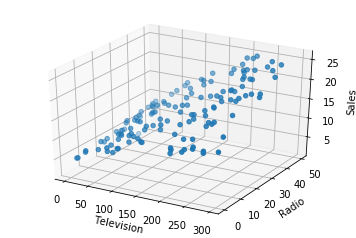

In [9]:
fig = plt.figure()

ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(train_data[:,0], train_data[:,1], train_sales)

ax1.set_xlabel('Television')
ax1.set_ylabel('Radio')
ax1.set_zlabel('Sales')
plt.show()

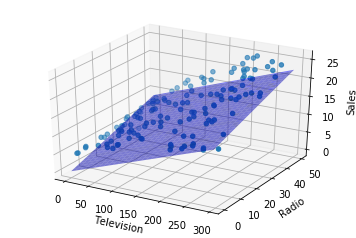

In [10]:
x = np.arange(0, 300,5) # Will use this to plot the regression surfaces, represents x-axis values
y = x/6 # Will use this to plot the regression surfaces, represents y-axis values
X, Y = np.meshgrid(x, y) # Needed to generate the surface plot

qdcof = model2.coef_ # coefficients of quadratic regression model

z_linear = np.array([model1.coef_[0] + model1.coef_[1]*x + model1.coef_[2]*y for x,y in zip(np.ravel(X), np.ravel(Y))])
z_quad = np.array([qdcof[0] + qdcof[1]*x + qdcof[2]*y + qdcof[3]*x*x + qdcof[4]*x*y  + qdcof[5]*y*y   \
                   for x,y in zip(np.ravel(X), np.ravel(Y))])

Z_linear = z_linear.reshape(X.shape) # reshape data into a form usable by plotting function
Z_quad= z_quad.reshape(X.shape) # reshape data into a form usable by plotting function

fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(train_data[:,0], train_data[:,1], train_sales) # plot the data points for reference
ax1.plot_surface(X, Y, Z_linear, color='blue', alpha=0.5, linewidth=0) # plot the linear regression surface
ax1.set_xlabel('Television')
ax1.set_ylabel('Radio')
ax1.set_zlabel('Sales')
plt.show()

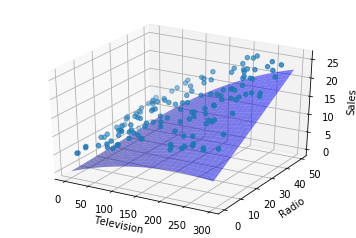

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
ax1.scatter(train_data[:,0], train_data[:,1], train_sales) # plot data points for reference
ax1.plot_surface(X, Y, Z_quad, color='blue', alpha=0.5, linewidth=0) # plot quadratic regression surface
ax1.set_xlabel('Television')
ax1.set_ylabel('Radio')
ax1.set_zlabel('Sales')
plt.show()

# Exercise - Using Regression for Prediction


Using the Credit Dataset provided, create  models to predict the Limit and Balance of potential customers.

The data includes the following variables:
 * Index - Unique Index for each customer
 * Income - Current Income of Customer
 * Limit - Current Credit Limit
 * Rating - Credit Rating 
 * Cards - Number of Cards owned
 * Age - Age of Customer
 * Education - Years of Education
 * Gender - Gender of Customer
 * Student - Status of Customer ( Yes or No )
 * Married - Marital Status ( Yes or No )
 * Ethnicity - ( Caucasian, African-American, Asian)
 * Balance - Current average credit card debt for Customer. 
   